<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/R_Beginner/01-06-02-functional-programming-purrr-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 6.2 Functional Programming with {purrr)

The {purrr} package, part of the {tidyverse}, enhances functional programming in R by providing a consistent and user-friendly set of tools for working with functions and vectors. It builds on the concepts of functional programming, making it easier to apply functions to data structures in a more readable and efficient way.

This tutorial introduces functional programming in R using the {purrr} package. Functional programming emphasizes writing reusable, modular code by applying functions to data structures, reducing reliance on loops. purrr offers tools to make this process clean and efficient. Functional programming avoids side effects, promotes pure functions, and simplifies code. In R, {purrr} replaces loops with functions like `map()`, making code more readable and less error-prone.




## Setup R in Python Runtype - Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
! pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp312-cp312-linux_x86_64.whl


##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Check and Install Required Packages

In [ ]:
%%R
packages <- c('tidyverse',
              'broom',
              'grid',
              'gridExtra',
              'patchwork',
              'purrr',
              'corrplot'
               )


In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')


In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse     broom      grid gridExtra patchwork     purrr  corrplot 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 


## Load Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

## Key purrr Functions

### The `map()` Family

The `map()` functions apply a function to each element of a list or vector and return a list or specific output type.

-   `map()`: Returns a list.

-   `map_dbl()`, `map_chr()`, `map_lgl()`: Return vectors of type double, character, or logical.

-   `map_df()`: Returns a data frame.

**Example: Squaring Numbers**:

In [ ]:
%%R
numbers <- c(1, 2, 3, 4)
purrr::map_dbl(numbers, ~ .x^2)

[1]  1  4  9 16


Here, `~ .x^2` is a formula-style anonymous function where `.x` represents each element.

**Example: Applying a Custom Function**

In [ ]:
%%R
double <- function(x) x * 2
purrr::map(numbers, double)


[[1]]
[1] 2

[[2]]
[1] 4

[[3]]
[1] 6

[[4]]
[1] 8



### Working with Lists

`purrr` excels with lists, common in R for handling complex data.

**Example: Extracting Elements from a List**

In [ ]:
%%R
data <- list(
  list(name = "Alice", age = 25),
  list(name = "Bob", age = 30)
)
purrr::map_chr(data, "name")

[1] "Alice" "Bob"  


## Iterating Over Multiple Inputs

`map2()` and `pmap()` allow functions to take multiple arguments.

**Example: map2()**

In [ ]:
%%R
x <- c(1, 2, 3)
y <- c(10, 20, 30)
purrr::map2_dbl(x, y, ~ .x + .y)

[1] 11 22 33


**Example: pmap()**

In [ ]:
%%R
params <- list(
  x = c(1, 2, 3),
  y = c(10, 20, 30),
  z = c(100, 200, 300)
)
purrr::pmap_dbl(params, ~ ..1 + ..2 + ..3)

[1] 111 222 333


Here, `..1`, `..2`, `..3` refer to the first, second, and third arguments.

### Conditional Mapping

-   `keep()`: Retain elements where a condition is TRUE.

-   `discard()`: Remove elements where a condition is TRUE.

**Example: Filtering Numbers**

In [ ]:
%%R
numbers <- c(1, 2, 3, 4, 5)
purrr::keep(numbers, ~ .x > 3)
purrr::discard(numbers, ~ .x > 3)

[1] 1 2 3


### Reducing Lists

`reduce()` combines elements of a list into a single result.

**Example: Summing a List**

In [ ]:
%%R
map(numbers, ~ .x * 10)  |>  reduce(`+`) # Returns: 150

The `|>` pipe passes the result of `map()` to `reduce()`.

## Data Frame Manipulation

Suppose you have a data frame and want to calculate summary statistics for numeric columns.

In [ ]:
%%R

df <- tibble(
  a = c(1, 2, 3),
  b = c(4, 5, 6),
  c = c("x", "y", "z")
)

# Apply mean() to numeric columns
df |>
  select(where(is.numeric))  |>
  map_dbl(mean) # Returns: a = 2, b = 5

a b 
2 5 


## Best Practices

-   Use formula syntax (`~`) for simple anonymous functions.

-   Choose the appropriate `map_*()` function for the desired output type.

-   Combine with tidyverse pipes for readable workflows.

-   Avoid side effects (e.g., modifying global variables) to keep functions pure.


## Functional Programming with with purrr: A Real-World Example

In this section, we will demonstrate functional programming using the `purrr` package to process a dataset containing Age Adjusted Lung & Bronchus Cancer Mortality Rates along with various covariates from 1998 to 2010. The goal is to split the dataset by year and write each subset to a separate CSV file and performs descriptive statistics, correlation analysis, and creates correlation matrix plots for each year

### Data


Age-adjusted lung and bronchus cancer mortality rates (1998–2010) by county were obtained from IHME and estimated using spatial Bayesian mixed effects models (Mokdad et al., 2016), incorporating seven sociodemographic covariates. To address small-sample instability, rates were smoothed using an Empirical Bayesian smoother in SpaceStat.

Age-standardized cigarette smoking prevalence by county (1996–2012) was estimated from BRFSS data using logistic hierarchical mixed effects models by sex, with age standardization to the 2000 census (Dwyer-Lindgren et al., 2014). Uncertainty was assessed via simulation.

County-level poverty rates came from the U.S. Census SAIPE program, combining survey data, population estimates, and administrative records.

PM2.5, NO2, and SO2 annual concentrations (1998–2012) were derived from satellite data (e.g., MODIS, GOME) and models, validated with ground measurements. All pollutant rasters were resampled to 2.5 km × 2 km using Empirical Bayesian Kriging (ArcGIS) and population-weighted means were calculated per county.

In [ ]:
%%R
data<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/R_Beginners/data_1998_2010_long_lbc.csv")

Rows: 46605 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): FIPS, X, Y, Year, SMOKING, POVERTY, PM25, NO2, SO2, RATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Split Data by Year and Write to CSV Files

The code avoids loops by leveraging `purrr::walk()`, which is designed for side effects like writing files. Each output file contains all columns from the original dataset for the corresponding year.

-   **Get Unique Years**: Extracts unique years from the `Year` column using `unique()`.
-   **Iterate with `walk()`**: The `walk()` function iterates over each year, filters the data for that year, creates a filename (e.g., `data_1998.csv`), and writes the subset to a CSV file using `write.csv()`. The `message()` function provides feedback on each file written.

In [ ]:
%%R
#setwd("/home/zia207/Dropbox/WebSites/R_Website/Quarto_Projects/R_Beginner/")
# Get unique years
unique_years <- unique(data$Year)

# Use purrr::walk to iterate over years and write files
walk(unique_years, ~ {
  year_data <- data[data$Year == .x, ]
  filename <- paste0("data_", .x, ".csv")
  write.csv(year_data, filename, row.names = FALSE)
  message("Written file: ", filename)
})

### Read All Files

In [ ]:
%%R
# Function to select numeric columns
select_numeric_cols <- function(df) {
  df %>% select(SMOKING, POVERTY, PM25, NO2, SO2, RATE)
}

# List all yearly CSV files
files <- list.files(pattern = "^data_\\d{4}\\.csv$", full.names = TRUE)

# Extract years from filenames
years <- str_extract(files, "\\d{4}")

# Read all files into a named list and select numeric columns
data_list <- map(files, ~ read.csv(.x) %>% select_numeric_cols()) %>%
  set_names(years)

# Print confirmation of loaded files
cat("Loaded", length(data_list), "CSV files for years:", paste(years, collapse = ", "), "\n")

Loaded 15 CSV files for years: 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012 


### Descriptive Statistics

In [ ]:
%%R
# Function to compute descriptive statistics (Min, Max, Mean, 95% CI)
compute_descriptive_stats <- function(df, year) {
  desc_stats <- df %>%
    summarise(across(.cols = everything(),
                     list(
                       Min = ~min(.x, na.rm = TRUE),
                       Max = ~max(.x, na.rm = TRUE),
                       Mean = ~mean(.x, na.rm = TRUE),
                       CI_lower = ~mean(.x, na.rm = TRUE) - qt(0.975, df = sum(!is.na(.x)) - 1) * sd(.x, na.rm = TRUE) / sqrt(sum(!is.na(.x))),
                       CI_upper = ~mean(.x, na.rm = TRUE) + qt(0.975, df = sum(!is.na(.x)) - 1) * sd(.x, na.rm = TRUE) / sqrt(sum(!is.na(.x)))
                     ),
                     .names = "{.col}.{.fn}")) %>%  # Use . instead of _ to avoid multiple underscores
    pivot_longer(cols = everything(),
                 names_to = c("Variable", "Statistic"),
                 names_sep = "\\.",  # Split on .
                 values_to = "Value") %>%
    pivot_wider(names_from = Statistic,
                values_from = Value,
                values_fn = mean) %>%  # Handle any duplicates by taking mean
    mutate(Year = year) %>%
    select(Year, Variable, Min, Max, Mean, CI_lower, CI_upper)

  # Debug: Check for duplicates
  duplicates <- desc_stats %>%
    summarise(n = n(), .by = c(Year, Variable)) %>%
    filter(n > 1)
  if (nrow(duplicates) > 0) {
    message("Duplicates found for Year ", year, ":\n")
    print(duplicates)
  }

  return(desc_stats)
}

# Compute descriptive statistics for each year
desc_stats_table <- imap_dfr(data_list, ~ {
  year <- .y
  df <- .x
  compute_descriptive_stats(df, year)
})

# Round numeric columns for display
desc_stats_table <- desc_stats_table %>%
  mutate(across(where(is.numeric), ~ round(.x, 3)))

# Print the table
cat("\nDescriptive Statistics Table (Min, Max, Mean, 95% CI):\n")
print(desc_stats_table)


Descriptive Statistics Table (Min, Max, Mean, 95% CI):
# A tibble: 90 × 7
   Year  Variable   Min     Max   Mean CI_lower CI_upper
   <chr> <chr>    <dbl>   <dbl>  <dbl>    <dbl>    <dbl>
 1 1998  SMOKING  11.8   37.1   26.6     26.5     26.8  
 2 1998  POVERTY   1.8   43.8   14.7     14.5     14.9  
 3 1998  PM25      1.38  26.0   12.8     12.6     13.0  
 4 1998  NO2       0.13  21.4    2.04     1.98     2.10 
 5 1998  SO2       0      0.632  0.059    0.056    0.062
 6 1998  RATE     17.4  211.    68.8     68.3     69.4  
 7 1999  SMOKING  11.3   38.2   26.8     26.6     26.9  
 8 1999  POVERTY   1.9   44.9   13.5     13.3     13.7  
 9 1999  PM25      1.71  22.8   10.8     10.6     10.9  
10 1999  NO2       0.11  16.7    2.05     1.99     2.11 
# ℹ 80 more rows
# ℹ Use `print(n = ...)` to see more rows


### Correlation Analysis

In [ ]:
%%R

# Function to compute correlation of RATE vs other variables (r and p-value)
compute_correlations <- function(df, year) {
  variables <- c("SMOKING", "POVERTY", "PM25", "NO2", "SO2")
  cor_results <- map_dfr(variables, ~ {
    test <- cor.test(df$RATE, df[[.x]], use = "complete.obs")
    tibble(
      Variable = .x,
      r = test$estimate,
      p_value = test$p.value
    )
  }) %>%
    mutate(Year = year) %>%
    select(Year, Variable, r, p_value)

  return(cor_results)
}

# Compute correlations for each year
cor_table <- imap_dfr(data_list, ~ {
  year <- .y
  df <- .x
  compute_correlations(df, year)
})

# Round numeric columns for display
cor_table <- cor_table %>%
  mutate(across(where(is.numeric), ~ round(.x, 3)))

# Print the table
cat("\nCorrelation Table (RATE vs Predictors):\n")
print(cor_table)


Correlation Table (RATE vs Predictors):
# A tibble: 75 × 4
   Year  Variable     r p_value
   <chr> <chr>    <dbl>   <dbl>
 1 1998  SMOKING  0.711       0
 2 1998  POVERTY  0.325       0
 3 1998  PM25     0.512       0
 4 1998  NO2      0.204       0
 5 1998  SO2      0.327       0
 6 1999  SMOKING  0.719       0
 7 1999  POVERTY  0.353       0
 8 1999  PM25     0.517       0
 9 1999  NO2      0.185       0
10 1999  SO2      0.331       0
# ℹ 65 more rows
# ℹ Use `print(n = ...)` to see more rows


### Correlation Matrix Plot

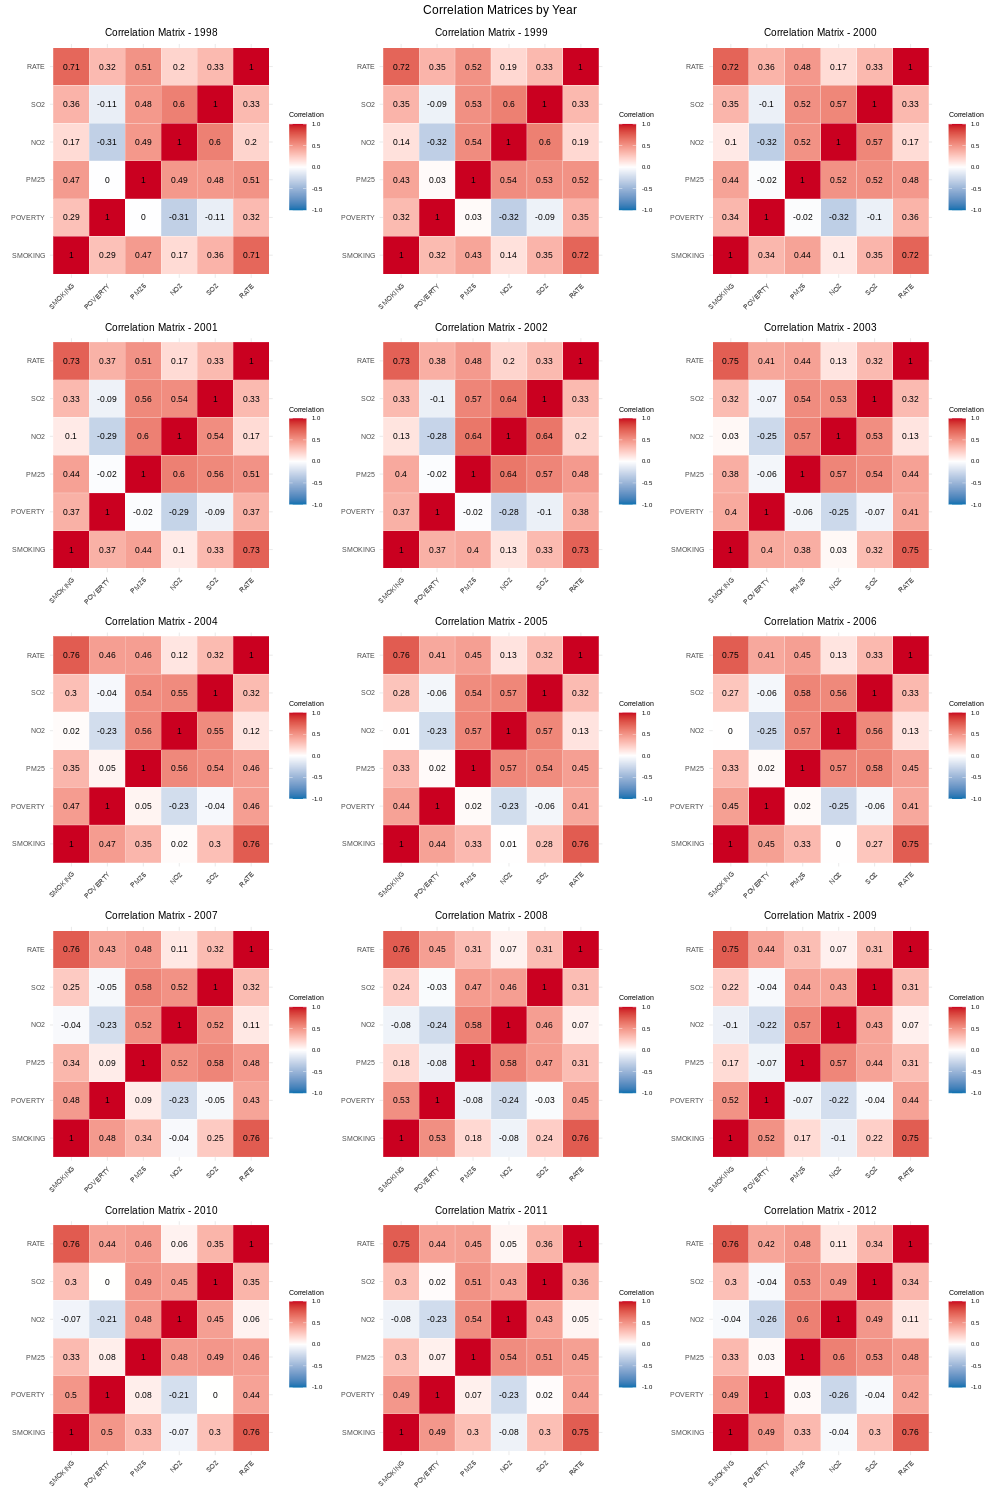

In [ ]:
%%R -w 1000 -h 1500

# Function to select numeric columns
select_numeric_cols <- function(df) {
  df %>% select(SMOKING, POVERTY, PM25, NO2, SO2, RATE)
}

# Function to compute correlation matrix
compute_correlation <- function(df) {
  cor_matrix <- cor(df, use = "complete.obs")
  return(cor_matrix)
}

# Function to create a correlation matrix plot as a ggplot object
create_correlation_plot <- function(cor_matrix, year) {
  # Convert correlation matrix to long format for ggplot
  cor_data <- as.data.frame(as.table(cor_matrix)) %>%
    rename(Var1 = Var1, Var2 = Var2, value = Freq) %>%
    mutate(
      Var1 = factor(Var1, levels = rownames(cor_matrix)),
      Var2 = factor(Var2, levels = colnames(cor_matrix))
    )

  # Create ggplot-based correlation plot
  p <- ggplot(cor_data, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile(color = "white") +
    geom_text(aes(label = round(value, 2)), color = "black", size = 3) +
    scale_fill_gradient2(low = "#0571b0", high = "#ca0020", mid = "white",
                         midpoint = 0, limit = c(-1, 1), name = "Correlation") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7),
      axis.text.y = element_text(size = 7),
      axis.title = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 10),
      legend.text = element_text(size = 6),
      legend.title = element_text(size = 7)
    ) +
    ggtitle(paste("Correlation Matrix -", year))

  return(p)
}

# List all yearly CSV files
files <- list.files(pattern = "^data_\\d{4}\\.csv$", full.names = TRUE)

# Extract years from filenames
years <- str_extract(files, "\\d{4}")

# Read all files into a named list and select numeric columns
data_list <- map(files, ~ read.csv(.x) %>% select_numeric_cols()) %>%
  set_names(years)

# Create correlation matrix plots for each year
plot_list <- imap(data_list, ~ {
  year <- .y
  df <- .x

  # Compute correlation matrix
  cor_matrix <- compute_correlation(df)

  # Create correlation plot
  create_correlation_plot(cor_matrix, year)
}) %>% set_names(years)

# Combine all plots into a single panel with 5 rows and 3 columns
combined_plot <- wrap_plots(plot_list, nrow = 5, ncol = 3) +
  plot_annotation(
    title = "Correlation Matrices by Year",
    theme = theme(plot.title = element_text(hjust = 0.5, size = 12))
  )

# Display the combined plot
print(combined_plot)

### Scatter Plots

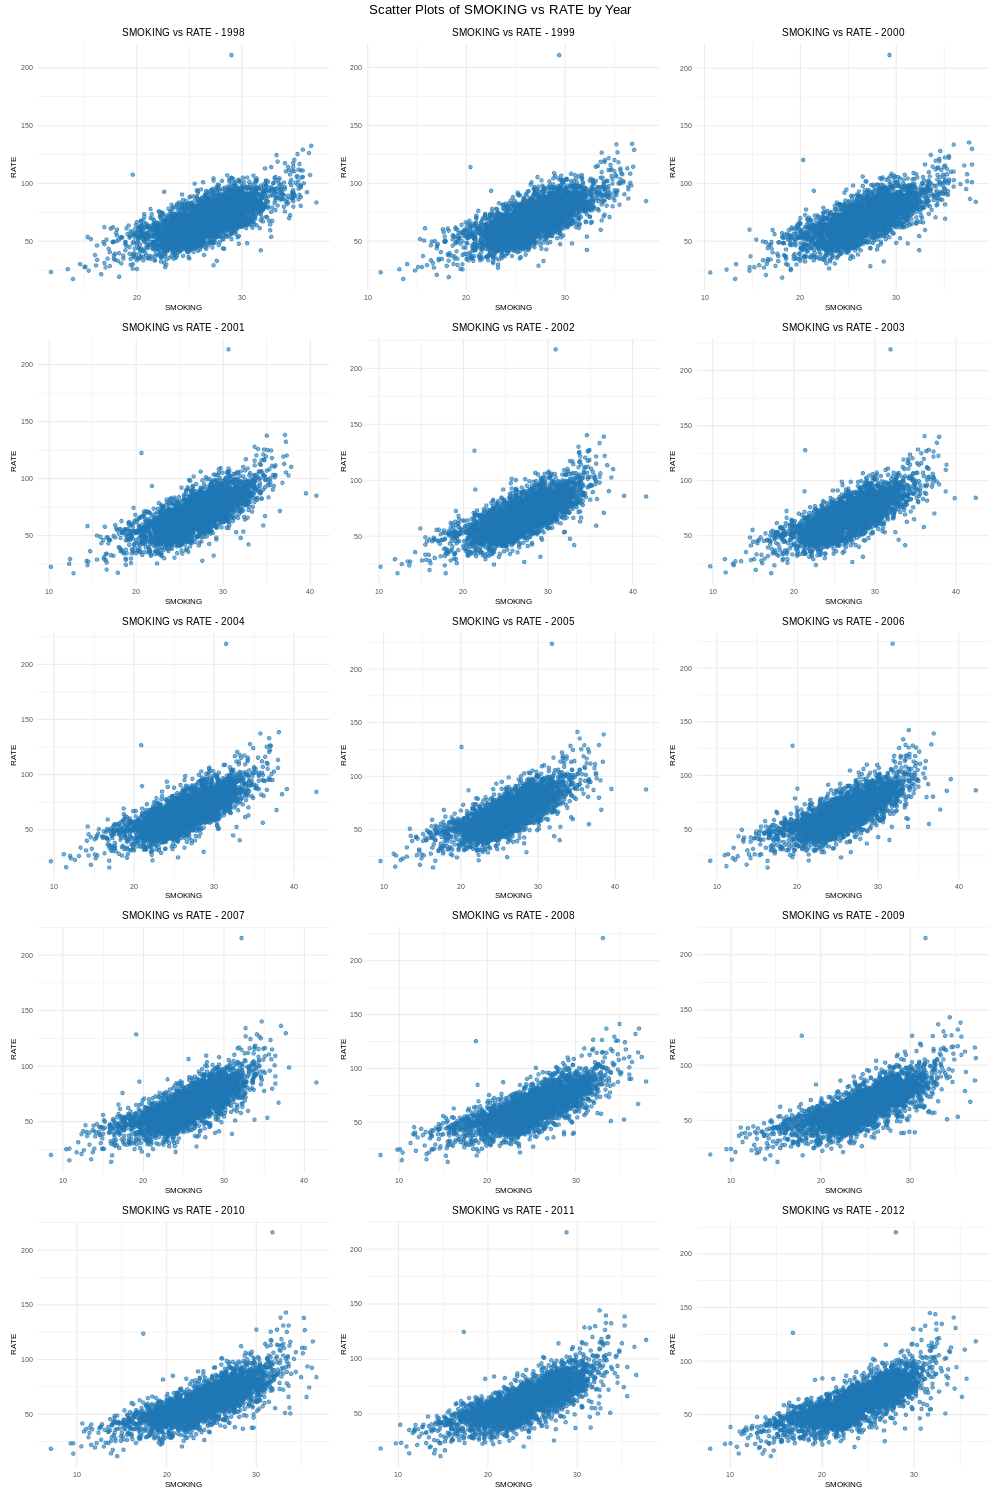

In [ ]:
%%R -w 1000 -h 1500
# Function to select numeric columns
select_numeric_cols <- function(df) {
  df %>% select(SMOKING, RATE)
}

# Function to create scatter plot for SMOKING vs RATE
create_scatter_plot <- function(df, year) {
  p <- ggplot(df, aes(x = SMOKING, y = RATE)) +
    geom_point(color = "#1f77b4", alpha = 0.6) +
    theme_minimal() +
    labs(
      title = paste("SMOKING vs RATE -", year),
      x = "SMOKING",
      y = "RATE"
    ) +
    theme(
      plot.title = element_text(hjust = 0.5, size = 10),
      axis.title = element_text(size = 8),
      axis.text = element_text(size = 7)
    )

  return(p)
}

# List all yearly CSV files
files <- list.files(pattern = "^data_\\d{4}\\.csv$", full.names = TRUE)

# Extract years from filenames
years <- str_extract(files, "\\d{4}")

# Read all files into a named list using purrr::map
data_list <- map(files, read.csv) %>% set_names(years)

# Create scatter plots for each year
plot_list <- imap(data_list, ~ {
  year <- .y
  df <- .x

  # Select SMOKING and RATE columns
  numeric_df <- select_numeric_cols(df)

  # Create scatter plot
  create_scatter_plot(numeric_df, year)
}) %>% set_names(years)

# Combine all plots into a single panel with 5 rows and 3 columns
combined_plot <- wrap_plots(plot_list, nrow = 5, ncol = 3) +
  plot_annotation(
    title = "Scatter Plots of SMOKING vs RATE by Year",
    theme = theme(plot.title = element_text(hjust = 0.5))
  )

# Display the combined plot
print(combined_plot)

### Multiple Linear Regression Analysis

In [ ]:
%%R
# Function to select numeric columns
select_numeric_cols <- function(df) {
  df %>% select(SMOKING, POVERTY, PM25, NO2, SO2, RATE)
}


# Function to fit multiple linear regression
fit_linear_regression <- function(df, year) {
  # Fit the model: RATE ~ SMOKING + POVERTY + PM25 + NO2 + SO2
  model <- lm(RATE ~ SMOKING + POVERTY + PM25 + NO2 + SO2, data = df)

  # Extract coefficients and R-squared using broom
  coefs <- tidy(model) %>%
    select(term, estimate) %>%
    pivot_wider(names_from = term, values_from = estimate)

  r_squared <- glance(model) %>%
    select(r.squared)

  # Combine coefficients and R-squared, add year
  result <- bind_cols(year = year, coefs, r_squared)

  return(result)
}

# List all yearly CSV files
files <- list.files(pattern = "^data_\\d{4}\\.csv$", full.names = TRUE)

# Extract years from filenames
years <- str_extract(files, "\\d{4}")

# Read all files into a named list using purrr::map
data_list <- map(files, read.csv) %>% set_names(years)

# Fit regression for each year and collect results
results <- imap_dfr(data_list, ~ {
  year <- .y
  df <- .x

  # Select numeric columns
  numeric_df <- select_numeric_cols(df)

  # Fit regression and get coefficients and R-squared
  fit_linear_regression(numeric_df, year)
})

# Format the table for display
results_table <- results %>%
  mutate(across(where(is.numeric), ~ round(.x, 3))) %>%
  rename(Year = year, Intercept = `(Intercept)`, R_squared = r.squared)

# Print the table
print(results_table)

# A tibble: 15 × 8
   Year  Intercept SMOKING POVERTY  PM25    NO2    SO2 R_squared
   <chr>     <dbl>   <dbl>   <dbl> <dbl>  <dbl>  <dbl>     <dbl>
 1 1998      -14.2    2.45   0.501 0.721  0.477  2.88      0.572
 2 1999      -17.1    2.49   0.515 1.15   0.128  0.739     0.596
 3 2000      -17.4    2.52   0.547 0.949  0.534  3.71      0.584
 4 2001      -17.6    2.49   0.475 1.22  -0.025  2.82      0.606
 5 2002      -19.0    2.52   0.534 1.06   0.256  3.69      0.601
 6 2003      -17.8    2.43   0.674 0.981  0.253  7.37      0.617
 7 2004      -18.5    2.43   0.554 1.26   0.095  6.03      0.636
 8 2005      -18.7    2.52   0.362 1.28   0.229  5.28      0.634
 9 2006      -19.1    2.54   0.373 1.34   0.146 11.2       0.625
10 2007      -19.1    2.50   0.336 1.49   0.48   5.07      0.638
11 2008      -18.7    2.60   0.38  1.36   0.313 27.4       0.619
12 2009      -19.5    2.64   0.342 1.33   0.752 41.4       0.616
13 2010      -17.4    2.50   0.311 1.68  -0.131 32.1       0.641
14 201

## Summary and Conclusion

This R tutorial demonstrates the application of functional programming principles using the purrr package to analyze county-level data on lung and bronchus cancer mortality rates (RATE) and associated covariates (SMOKING, POVERTY, PM25, NO2, SO2) from 1998 to 2010. The data, sourced from reputable institutions like IHME, BRFSS, SAIPE, and satellite-based measurements, was processed to perform various analyses, leveraging purrr’s functional tools to avoid explicit loops and enhance code clarity. The tutorial is structured into modular scripts, showcasing the power of functional programming in data processing, statistical analysis, and visualization.

This tutorial illustrates the power of functional programming in R using purrr to process and analyze a complex dataset efficiently. By leveraging map, imap, and related functions, the code avoids explicit loops, resulting in cleaner, more maintainable scripts. The modular structure—split into data loading, descriptive statistics, correlation analysis, visualization, and regression—demonstrates best practices for organizing data analysis workflows. The use of tidyverse tools (dplyr, tidyr, ggplot2) alongside purrr and patchwork enables seamless data manipulation and visualization, while broom simplifies model output extraction. Error resolution (e.g., fixing column naming issues) highlights the importance of debugging and validating data processing steps. This approach is particularly valuable for repetitive tasks across multiple years or datasets, making it scalable for larger analyses. Researchers can adapt these techniques to similar datasets, ensuring efficient, reproducible, and visually clear analyses of public health data like cancer mortality and environmental covariates.

## Resources

1. **Purrr Documentation**
   - **Link**: [https://purrr.tidyverse.org/](https://purrr.tidyverse.org/)
   - **Description**: Official `purrr` documentation with guides on `map`, `imap`, `map_dfr`, and other functions for functional iteration.

2. **"R for Data Science" - Iteration Chapter**
   - **Link**: [https://r4ds.hadley.nz/iteration.html](https://r4ds.hadley.nz/iteration.html)
   - **Description**: Covers `purrr` for functional programming, with examples of replacing loops with `map` variants.

3. **"Advanced R" - Functional Programming**
   - **Link**: [https://adv-r.hadley.nz/functional-programming.html](https://adv-r.hadley.nz/functional-programming.html)
   - **Description**: Explains `purrr`’s functional programming tools, including `map`, `imap`, and anonymous functions.

4. **Purrr Cheat Sheet**
   - **Link**: [https://rstudio.github.io/cheatsheets/purrr.pdf](https://rstudio.github.io/cheatsheets/purrr.pdf)
   - **Description**: A concise reference for `purrr` functions, ideal for quick lookup of `map`, `imap_dfr`, etc.

5. **"Functional Programming in R" by Thomas Mailund**
   - **Link**: [https://www.springer.com/gp/book/9781484227459](https://www.springer.com/gp/book/9781484227459)
   - **Description**: A book on functional programming in R, focusing on `purrr` for data analysis tasks.